# 5.0 Conclusion

In [74]:
import pandas as pd
from src.utils.paths import data_dir
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
BASIC_METRICS = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [76]:
# Importamos las metricas
df_metrics_knn = pd.read_csv(data_dir("processed", "metrics_knn.csv"), index_col='algorithm')
df_metrics_tree = pd.read_csv(data_dir("processed", "metrics_tree.csv"), index_col='algorithm')
df_metrics_rforest = pd.read_csv(data_dir("processed", "metrics_rforest.csv"), index_col='algorithm')

<Figure size 1080x576 with 0 Axes>

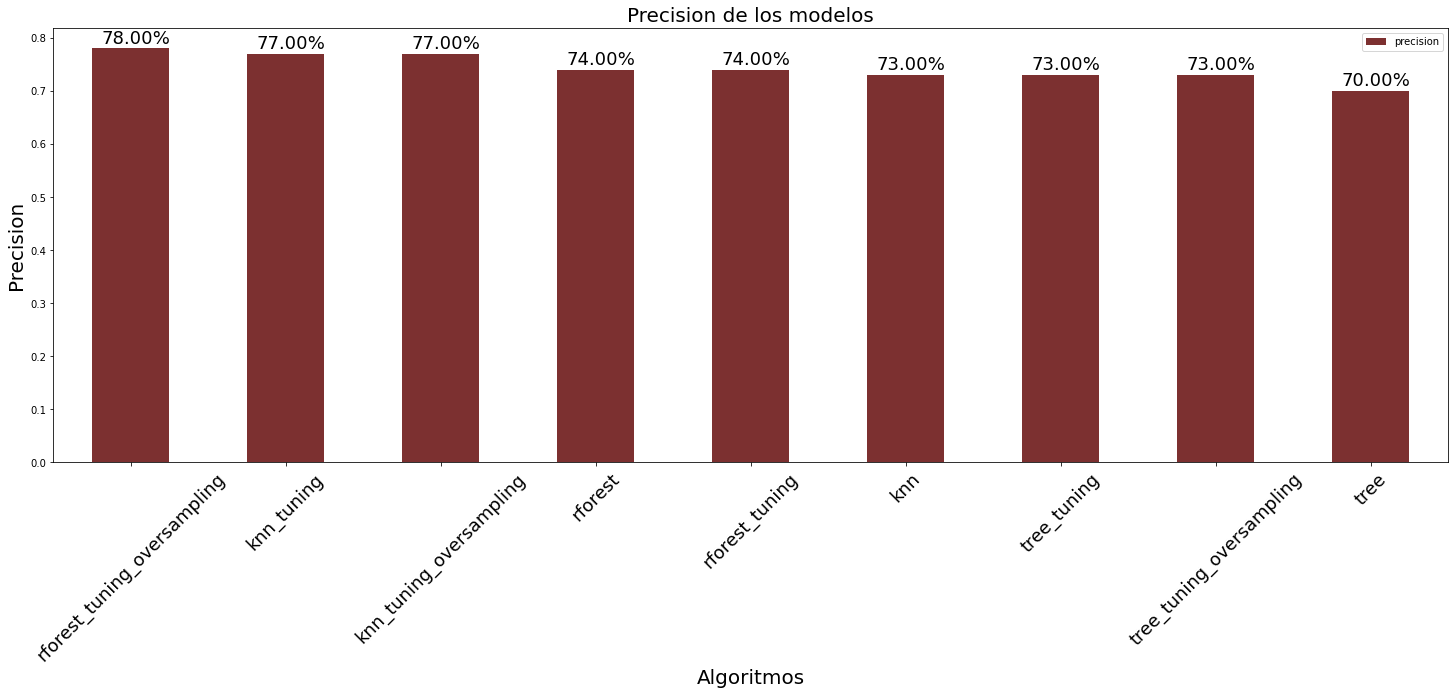

In [85]:
df = df_precision_roc_auc[['precision']].sort_values(by=['precision'], ascending=False)
plt.figure(figsize=(15, 8))
ax = df_precision_roc_auc[['precision']].sort_values(by=['precision'], ascending=False).plot(kind='bar',figsize=(25,8),color="#7C3030")
plt.xticks(size=18, rotation=45)
plt.title('Precision de los modelos', fontsize=20)
plt.xlabel('Algoritmos', size=20)
plt.ylabel('Precision', size=20)

total = len(df['precision'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.19
    y = p.get_y() + p.get_height() + 0.01
    ax.annotate(percentage, (x, y), size = 18)

Depués de haber probado 3 algoritmos, knn, decision tree y random forest, y con cada uno configurado la optimizacion de hiperparametros con BayesSearchCV y tambien con oversampling, hemos encontrado que el mejor algoritmos es el random forest con oversampling y la optimizacion de hiperparametros con BayesSearchCV.
Todas las opimizaciones las hicimos buscando optimizar la metrica de precision, ya que es de interes del negocio reducir los falsos positivos. Como nuestro objetivo es detectar los vinos de alta calidad, y nuestra variable target es una variable booleana que inidica 1 si el vino es de alta calidad y 0 si no lo es, tener una alta tasa de falsos positivos implicaria que la gran parte de los vinos de baja calidad se exportanran como de alta calidad. 
Con una busqueda de incersión en el mercado de otros paises, exportar vinos de baja calidad como si fueran de alta calidad generaría en los clientes un rechazo sin la posbilidad de generar una fidelidad con nuestros vinos. 
Con el analisis hecho sobre dos datasets que no teninan nigun tipo de relacion creemos que un 78% de precision es una buena métrica para este MVP.